In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import os, sys

In [2]:
csv_path = "Data/Boyaca_NDVI_EVI_SoilMoisture_MENSUAL_2005_2025_CLEAN.csv"
assert os.path.exists(csv_path), f"Archivo no encontrado en {csv_path}"

In [3]:
# Cargar
df = pd.read_csv(csv_path, low_memory=False)
print("CSV cargado. Shape:", df.shape)
print("Head del dataset", df.head())

CSV cargado. Shape: (248, 6)
Head del dataset         EVI      NDVI       fecha  year  month   yyyymm
0  0.381304  0.688825  2005-01-01  2005      1  2005-01
1  0.362783  0.668144  2005-02-01  2005      2  2005-02
2  0.379677  0.632942  2005-03-01  2005      3  2005-03
3  0.435677  0.667824  2005-04-01  2005      4  2005-04
4  0.405432  0.695091  2005-05-01  2005      5  2005-05


In [4]:
date_col = "fecha"
print("Columna fecha detectada:", date_col)

if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce', dayfirst=True, infer_datetime_format=True)
    if df[date_col].isna().all():
        print("Advertencia: la columna fecha existe pero no se pudo parsear. Revisar formato.")
    else:
        df = df.set_index(date_col).sort_index()
        print("Índice temporal establecido. Rango:", df.index.min(), "-", df.index.max())

Columna fecha detectada: fecha
Índice temporal establecido. Rango: 2005-01-01 00:00:00 - 2025-01-08 00:00:00


C:\Users\CYBER\AppData\Local\Temp\ipykernel_13112\1003988971.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce', dayfirst=True, infer_datetime_format=True)


In [6]:
# Tipos y missing
dtypes = df.dtypes.reset_index()
dtypes.columns = ["column","dtype"]
missing = df.isna().sum().reset_index()
missing.columns = ["column","missing_count"]
missing["missing_pct"] = missing["missing_count"] / df.shape[0]
print("Tipos de columnas", dtypes)
print("Missing (por columna)", missing.sort_values("missing_pct", ascending=False).head(30))

Tipos de columnas    column    dtype
0     EVI  float64
1    NDVI  float64
2    year    int64
3   month    int64
4  yyyymm   object
Missing (por columna)    column  missing_count  missing_pct
0     EVI              0          0.0
1    NDVI              0          0.0
2    year              0          0.0
3   month              0          0.0
4  yyyymm              0          0.0


In [7]:
# Detectar columnas relevantes (NDVI, EVI, Soil, Moisture)
candidates = [c for c in df.columns if any(k in c.lower() for k in ["ndvi","evi","soil","moist","sm","precip","temp"])]
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas:", numeric_cols)
print("Columnas candidatas:", candidates)

Columnas numéricas: ['EVI', 'NDVI', 'year', 'month']
Columnas candidatas: ['EVI', 'NDVI']


In [8]:
# Estadísticas descriptivas (numéricas)
if len(numeric_cols)>0:
    stats = df[numeric_cols].describe().T
    print("Estadísticas descriptivas", stats)
else:
    print("No hay columnas numéricas detectadas para estadística descriptiva.")

Estadísticas descriptivas        count         mean       std          min          25%          50%  \
EVI    248.0     0.415884  0.030513     0.322249     0.396819     0.419184   
NDVI   248.0     0.690760  0.031170     0.547600     0.674575     0.697605   
year   248.0  2014.838710  5.980247  2005.000000  2010.000000  2015.000000   
month  248.0     6.435484  3.445920     1.000000     3.000000     6.000000   

               75%          max  
EVI       0.437864     0.499423  
NDVI      0.712912     0.746885  
year   2020.000000  2025.000000  
month     9.000000    12.000000  


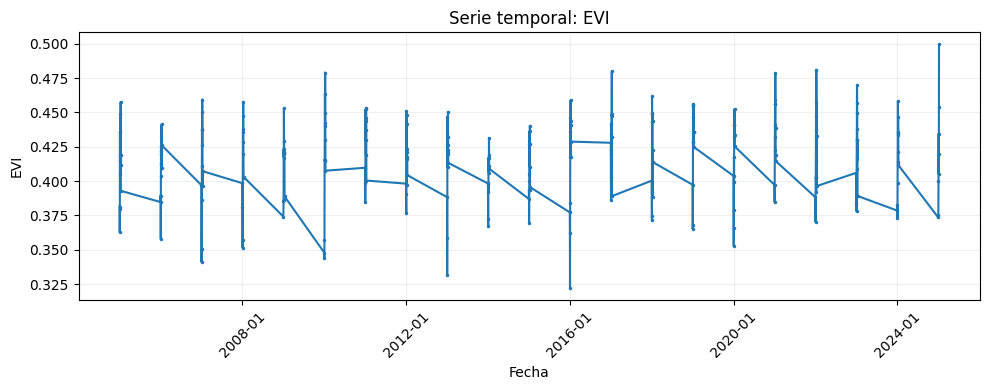

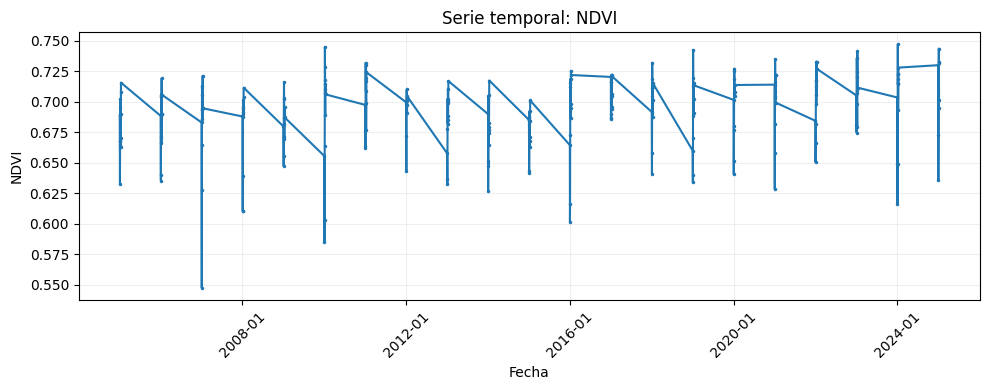

In [9]:
# Series temporales: graficar candidatos (si índice es datetime)
plot_cols = candidates if candidates else numeric_cols[:4]
if pd.api.types.is_datetime64_any_dtype(df.index) and len(plot_cols)>0:
    for col in plot_cols:
        plt.figure(figsize=(10,4))
        plt.plot(df.index, df[col], marker='.', linestyle='-', markersize=3)
        plt.title(f"Serie temporal: {col}")
        plt.xlabel("Fecha"); plt.ylabel(col)
        plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))
        plt.xticks(rotation=45); plt.grid(alpha=0.2)
        plt.tight_layout(); plt.show()
else:
    print("No se graficaron series (falta índice datetime o columnas).")